# **Decision Tree**

A decision tree is a hierarchical, flowchart-like structure used in supervised machine learning for both classification and regression tasks. It starts with a root node, which asks a question about data, leading to branches with potential answers, then to internal (decision) nodes that ask more questions, and finally to leaf nodes that provide the final prediction or classification. Decision trees are popular because they are easy to interpret, can be converted to "if-then" rules, and help visualize how an algorithm reaches a decision.

Decision Trees used for both
* Classification
* Regression

In [61]:
# loading the libraries

import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

import dtreeviz
import graphviz.backend as be

import matplotlib.pyplot as plt
import seaborn as sns

### On "Categorical Data"

Dataset Download link: [Play Tennis](https://drive.google.com/file/d/1FyL3UaV9H-5ZkXHtL8GTVy7itREzPXhy/view?usp=drive_link)

In [3]:
# loading the dataset

tennis = pd.read_csv("../datasets/play_tennis.csv")

In [5]:
print(f"Size of the data: {tennis.shape}")
tennis.head()

Size of the data: (14, 6)


,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [6]:
X = tennis.drop(['day', 'play'], axis = 1)
y = tennis['play']

In [12]:
# loading the data and training

le = LabelEncoder()
le_x = []
for col in X.columns:
    X[col] = le.fit_transform(X[col])
    le_x.append(le)

le_y = LabelEncoder()
y = le_y.fit_transform(y)


In [26]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [27]:
# scores
from sklearn.metrics import classification_report

y_pred = clf.predict(X)

print("Classificaiton Report:\n", classification_report(y_pred=y_pred, y_true=y))

Classificaiton Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



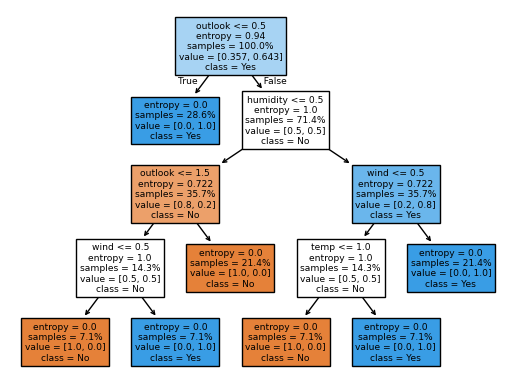

In [28]:
# visualizing the tree

plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, proportion=True)
plt.show()

### On "Continues data"

In [ ]:
# loading iris dataset

iris = load_iris()

print("Feature names:\n", iris.feature_names)
print("Output names:\n", iris.target_names)

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Output names:
 ['setosa' 'versicolor' 'virginica']


In [37]:
X, y = iris.data, iris.target


print("shape of X:", X.shape)
print("shape of y:", y.shape)

shape of X: (150, 4)
shape of y: (150,)


In [39]:
# splitting into trian and test

x_trian, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
# training the model

clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(x_trian, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [41]:
# scores

Y_pred_train = clf.predict(x_trian)

print("Train classfication report:\n", classification_report(y_train, Y_pred_train))

Train classfication report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [42]:
Y_pred_test = clf.predict(x_test)

print("Test classfication report:\n", classification_report(y_test, Y_pred_test))

Test classfication report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



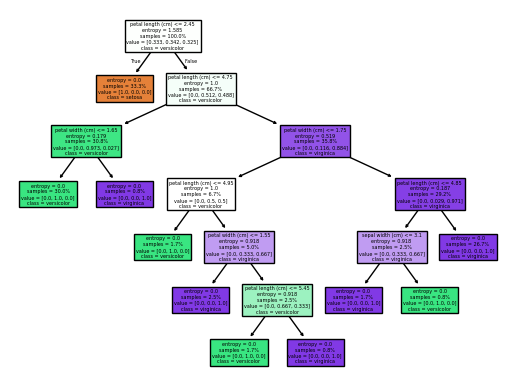

In [45]:
# getting f1 score of 1
# plotting

plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, proportion=True)
plt.show()

In [49]:
# more better visualization

viz = dtreeviz.model(clf, x_trian, y_train, feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"])
viz

### Hyper parameter tuning

In [51]:
from sklearn.datasets import load_breast_cancer

In [53]:
data = load_breast_cancer()
X = data.data
y = data.target

In [54]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
dtree = DecisionTreeClassifier(random_state=42)

pipe = Pipeline([
    ("classifier", dtree)
])

In [63]:
param_grid = {
    "classifier__criterion":['gini', 'entropy'],
    "classifier__max_depth":[3, 4, 5, 6, None],
    "classifier__min_samples_split": [2, 3, 4],
    "classifier__min_samples_leaf": [1, 2, 3, 4]
}

grid_search = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

In [64]:
grid_search.fit(x_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best score (f1):", grid_search.best_score_)

Best params: {'classifier__criterion': 'entropy', 'classifier__max_depth': 4, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 2}
Best score (f1): 0.954639001717503
